标准曲线点数： 5
输入第1个浓度： 1
输入第对应的响应值 0.098
输入第2个浓度： 2
输入第对应的响应值 0.201
输入第3个浓度： 3
输入第对应的响应值 0.301
输入第4个浓度： 4
输入第对应的响应值 0.3999
输入第5个浓度： 5
输入第对应的响应值 0.4998


斜率：0.10025
截距：-0.0008100000000000329
相关系数r：0.9999731007551712


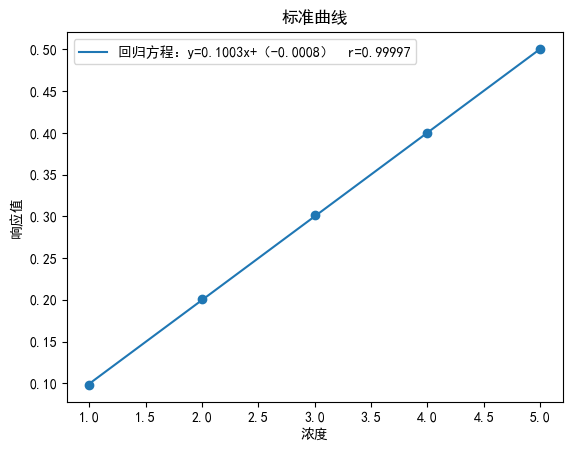

In [7]:
import pandas as pd  # 导入pandas包模块
from datetime import datetime  # 导入时间模块
import scipy.stats as st  # 导入曲线计算模块
import matplotlib.pyplot as plt # 导入绘图模块
import numpy as np

#输入实验数据，保存实验数据
n = int(input("标准曲线点数："))
x = list(range(n))
y = list(range(n))
for i in range(n):
    x[i] = float(input("输入第"+ str(i+1)+"个浓度："))
    y[i] = float(input("输入第对应的响应值"))
# 创建pandas数据帧，计算系数
data = {
    "浓度":x,
    "响应值":y
    }
df = pd.DataFrame(data)
a, b, r, p, s = st.linregress(df.iloc[:,0], df.iloc[:,1])
print("斜率："+str(a))
print("截距："+str(b))
print("相关系数r："+str(r))
# 保存数据
data1 = pd.DataFrame({"斜率":[a], "截距":[b], "相关系数":[r]})
df = df._append(data1, ignore_index=True)
now = datetime.now() # 获取当前时间
current_time_str = now.strftime('%Y-%m-%d-%H-%M-%S') # 转换为特定格式事件字符串
df.to_csv(f"data{current_time_str}.csv", index=False)
# 绘制图片
con = np.array(x)
value = con*a+b
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(x, y)
plt.plot(con, value, label=f"回归方程：y={a:.4f}x+（{b:.4f}）  r={r:.5f}")
plt.title("标准曲线")
plt.legend()
plt.xlabel("浓度")
plt.ylabel("响应值")
plt.show()